In [1]:
# Constant file containing what we need for the project ####
import numpy as np 
from scipy.stats import lognorm
from scipy.stats import norm 
from scipy.stats import halfcauchy



# np.random.seed(1234)

def const(deltaT):

    deltaT=deltaT
    T_MAX = 100
    S_0= 67*10**6
    set_size = int(T_MAX/deltaT)
    p_a = np.random.uniform(0.4,0.9)
    p_IH =np.random.uniform(0.05,0.2)
    p_IU = np.random.uniform(0.01,0.04)
    p_HD = np.random.uniform(0.1,0.2)
    p_HU = np.random.uniform(0.1,0.2)
    p_UD = np.random.uniform(0.2,0.4) 
    R_0 = np.random.uniform(2.9,3.4)
    mu = np.random.uniform(0.01,0.08) 
    lambda_1 =np.random.uniform(10**(-4),10**(-3))
    t_0 = np.random.randint(1,30)
    N = np.random.randint(30,50)
    N_I = np.random.randint(8,12)
    N_H = np.random.randint(15,25)
    N_U = np.random.randint(10,20)
    I_moins_0   = np.random.randint(1,100)
    gamma_IR    = (p_a + (1-p_a)*(1-p_IH-p_IU))/N_I
    gamma_IH    = (1-p_a)*p_IH/N_I
    gamma_IU    = (1-p_a)*p_IU/N_I
    gamma_HD    = p_HD/N_H
    gamma_HU    = p_HU/N_H
    gamma_HR    = (1-p_HD-p_HU)/N_H
    gamma_UD    = p_UD/N_U
    gamma_UR    = (1-p_UD)/N_U
    tau_0       = R_0*(lambda_1+gamma_IR + gamma_IH + gamma_IU)/S_0
    t           = np.array([t_0 + i*deltaT for i in range(int(set_size))])
    tau         = [tau_0*np.exp(-mu*max(t[i]-N,0)) for i in range(int(set_size))] 
    return(deltaT, T_MAX, S_0, set_size, p_a, p_IH, p_IU, p_HD, p_HU, p_UD, R_0, mu, lambda_1, t_0, N, N_I, N_H, N_U, I_moins_0, gamma_IR, gamma_IH , gamma_IU, gamma_HD , gamma_HU , gamma_HR,gamma_UD,gamma_UR,tau_0 ,t, tau)

deltaT, T_MAX, S_0, set_size, p_a, p_IH, p_IU, p_HD, p_HU, p_UD, R_0, mu, lambda_1, t_0, N, N_I, N_H, N_U, I_moins_0, gamma_IR, gamma_IH , gamma_IU, gamma_HD , gamma_HU , gamma_HR,gamma_UD,gamma_UR,tau_0 ,t, tau=const(1)






In [2]:
import numpy as np

#from constant import *
from scipy import *
from scipy import stats
from pylab import *     
from scipy.integrate import odeint # Module de résolution des équations différentielles
import plotly as po
from progressbar import ProgressBar
import matplotlib.pyplot as plt

In [3]:
def euler_one_step(S,I_moins,I_plus,R_moins,R_plus_I,H,U,R_plus_H,D,D_R,i,deltaT, T_MAX, S_0, set_size, p_a, p_IH, p_IU, p_HD, p_HU, p_UD, R_0, mu, lambda_1, t_0, N, N_I, N_H, N_U, I_moins_0, gamma_IR, gamma_IH , gamma_IU, gamma_HD , gamma_HU , gamma_HR,gamma_UD,gamma_UR,tau_0 ,t, tau):
    S_1        = S-tau[i]*S*I_moins*deltaT
    I_moins_1  = I_moins + (tau[i]*S*I_moins-lambda_1*I_moins-(gamma_IR+gamma_IH+gamma_IU)*I_moins)*deltaT
    I_plus_1   = I_plus +(lambda_1*I_moins-(gamma_IR+gamma_IH+gamma_IU)*I_plus)*deltaT
    R_moins_1  = R_moins +(gamma_IR*I_moins)*deltaT
    R_plus_I_1 = R_plus_I + (gamma_IR*I_plus)*deltaT
    H_1        = H + (gamma_IH*(I_moins + I_plus)-(gamma_HR+gamma_HD+gamma_HU)*H)*deltaT
    U_1        = U + (gamma_IU*(I_moins + I_plus)+gamma_HU*H-(gamma_UR + gamma_UD)*U)*deltaT
    R_plus_H_1 = R_plus_H+ (gamma_HR*H+gamma_UR*U)*deltaT
    D_1        = D + (gamma_UD*U+gamma_HD*H)*deltaT  
    D_R_1      = D_R +((lambda_1+gamma_IH+gamma_IU)*I_moins-D_R)*deltaT
    
    
    return(S_1,I_moins_1,I_plus_1,R_moins_1,R_plus_I_1,H_1,U_1,R_plus_H_1,D_1,D_R_1)


def resolution_systeme(deltaT, T_MAX, S_0, set_size, p_a, p_IH, p_IU, p_HD, p_HU, p_UD, R_0, mu, lambda_1, t_0, N, N_I, N_H, N_U, I_moins_0, gamma_IR, gamma_IH , gamma_IU, gamma_HD , gamma_HU , gamma_HR,gamma_UD,gamma_UR,tau_0 ,t, tau):
    Res = np.zeros((10,set_size))
    Res[0,0] = S_0
    Res[1,0] = I_moins_0
    
    for i in range(1,set_size):
        Res[:,i] = euler_one_step(Res[0,i-1],Res[1,i-1],Res[2,i-1],Res[3,i-1],Res[4,i-1],Res[5,i-1],Res[6,i-1],Res[7,i-1],Res[8,i-1],Res[9,i-1],i,deltaT, T_MAX, S_0, set_size, p_a, p_IH, p_IU, p_HD, p_HU, p_UD, R_0, mu, lambda_1, t_0, N, N_I, N_H, N_U, I_moins_0, gamma_IR, gamma_IH , gamma_IU, gamma_HD , gamma_HU , gamma_HR,gamma_UD,gamma_UR,tau_0 ,t, tau)
 
    return Res



In [9]:
## Implémentation de la méthode de Monte Carlo classique pour la résolution du système différentiel. 

M = 10000

def Monte_Carlo(M, methode):
    """
    Echantillonage de Monte Carlo 
    
    Paramètres : 
    ------------
    
    M : int, 
        Taille de l'échantillon. 
    
    Sorties : 
    ---------
    peak_value  : list,
        Nombre de cas en réanimation au pic de l'épidémie pour chaque simulation.
    peak_day    : list, 
        Jour du pic pour chaque simulation.
    pos         : list, 
        Nombre de cas au pic de l'épidémie pour chaque simulation.
    
    """
    
    print(f"Echantillonnage de Monte Carlo sur {M} simulations")
    peak_value,peak_day, pos = [],[], []
    pbar = ProgressBar()
    for i in pbar(range(M)):
        if methode == 'odeint':
            variables = init_variables(deltaT=global_constants['deltaT'],global_constants = global_constants)
            constants = compute_constants(variables)
            syst_CI=array([global_constants['S_0'],variables['I_moins_0'],0,0,0,0,0,0,0,0])
            simulation=odeint(equa_diff,syst_CI,constants['t'], args = (variables,constants))      
            peak_value.append(np.max(simulation[:,6]))
            peak_day.append(int(np.argmax(list(simulation[:,6]))*global_constants['deltaT']))
            pos.append(np.max(simulation[:,1]))
        if methode == 'euler' :
            #variables = init_variables(deltaT=global_constants['deltaT'],global_constants = global_constants)
            #constants = compute_constants(variables)
            deltaT, T_MAX, S_0, set_size, p_a, p_IH, p_IU, p_HD, p_HU, p_UD, R_0, mu, lambda_1, t_0, N, N_I, N_H, N_U, I_moins_0, gamma_IR, gamma_IH , gamma_IU, gamma_HD , gamma_HU , gamma_HR,gamma_UD,gamma_UR,tau_0 ,t, tau=const(0.1)
            #print(deltaT, T_MAX, S_0, set_size, p_a, p_IH, p_IU, p_HD, p_HU, p_UD, R_0, mu, lambda_1, t_0, N, N_I, N_H, N_U, I_moins_0, gamma_IR, gamma_IH , gamma_IU, gamma_HD , gamma_HU , gamma_HR,gamma_UD,gamma_UR,tau_0 ,t, tau)
            #print('')
            simulation = resolution_systeme(deltaT, T_MAX, S_0, set_size, p_a, p_IH, p_IU, p_HD, p_HU, p_UD, R_0, mu, lambda_1, t_0, N, N_I, N_H, N_U, I_moins_0, gamma_IR, gamma_IH , gamma_IU, gamma_HD , gamma_HU , gamma_HR,gamma_UD,gamma_UR,tau_0 ,t, tau)
            peak_value.append(np.max(simulation[6]))
            peak_day.append(int(np.argmax(list(simulation[6]))*deltaT))
            pos.append(np.max(simulation[1]))
        
    return (peak_value,peak_day,pos)

peak_value,peak_day,pos = Monte_Carlo(M, methode = 'euler')

  0% (3 of 10000) |                      | Elapsed Time: 0:00:00 ETA:   0:09:25

Echantillonnage de Monte Carlo sur 10000 simulations


100% (10000 of 10000) |##################| Elapsed Time: 0:04:15 Time:  0:04:15


La valeur moyenne du pic est de 20158.57 et appartient à l'intervalle de confiance à 95% suivant : [19113.73,21203.42] 
 Le quantile à 10% du pic de réanimation est : 26.281353185657434
 Le quantile à 90% du pic de réanimation est : 58860.46748649435
1167.4979900152669 501.460675126619


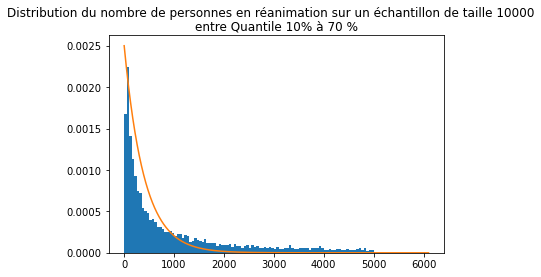

In [8]:
mean_value = np.mean(peak_value)
var_value  = np.var(peak_value)
q_10 = np.quantile(peak_value, 0.1, axis = None)
q_70 = np.quantile(peak_value, 0.7, axis = None)
q_90 = np.quantile(peak_value, 0.9, axis = None)


print(f"La valeur moyenne du pic est de {round(mean_value,2)} et appartient à l'intervalle de confiance à 95% suivant : [{max(0,round(mean_value-1.96*np.sqrt(var_value/M),2))},{round(mean_value+1.96*np.sqrt(var_value/M),2)}] ")
print(f" Le quantile à 10% du pic de réanimation est : {q_10}")
print(f" Le quantile à 90% du pic de réanimation est : {q_90}")



# Compte tenu de la valeur du quantile à 90% nous tronquons donc la liste par soucis de visibilité. 


fig = plt.figure()
fig.suptitle(f"Distribution du nombre de personnes en réanimation sur un échantillon de taille {M}")
plt.hist([value for value in peak_value if ( value > q_10 and value < q_70)], bins = 100, density = 1, range=[0,5000])
plt.title('entre Quantile 10% à 70 %')
#axs[1].hist([value for value in peak_value if value < q_70], bins = 100, density = True)
#axs[1].set_title('Quantile à 70 %')
x=np.arange(0,max([value for value in peak_value if ( value > q_10 and value < q_70)]), 0.01)
Moy = np.mean([value for value in peak_value if ( value > q_10 and value < q_70)])
Median = np.median([value for value in peak_value if (value > q_10 and value < q_70)])
print(Moy, Median)
plt.plot(x,stats.expon.pdf(x, scale=400), label="densité") 
#plt.subplots_adjust(hspace=0.5)
plt.show()

In [59]:
[value for value in peak_value if ( value > q_10 and value < q_70)]

[4167.522547239124,
 95.09820785850354,
 32.661938945335784,
 900.569071806987,
 759.4425921660195,
 436.84952221711234,
 378.4357902356978,
 61.514968573282125,
 4620.097033195207,
 2451.9634697604633,
 98.05214244324982,
 32.011354671649414,
 488.0159170070513,
 1082.1804122470255,
 320.8840773584861,
 96.707317223205,
 211.7737075481899,
 1037.8211859709068,
 275.5632698063153,
 608.2124730927613,
 244.30338573099306,
 282.59032298095946,
 24.564373657570247,
 3825.293776272045,
 453.16978367152166,
 160.26463504393035,
 89.8197475545967,
 84.6259114022724,
 2243.497994591825,
 518.4248395101417,
 2502.1049016886973,
 2836.1495155036587,
 214.43054394832672,
 1774.8892386803354,
 1736.4044475645712,
 825.0594838879675,
 37.75196006939964,
 37.731664832897714,
 672.8451064650793,
 1026.977026157778,
 679.8187485292784,
 32.7327834923135,
 1647.0604818848547,
 1740.0505638587433,
 1861.429851519642,
 1372.598545976327,
 145.53274062777714,
 154.43067025059682,
 218.36210229615568,
 20